In [5]:
/pwd

'c:\\Users\\jinwo\\OneDrive\\바탕 화면\\BondAge_Project'

# 0.Import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.linear_model import LinearRegression

import re
import os
import shutil
import glob
import zipfile
import cv2



# 1.Path

In [12]:
#이미지 함수
def show(img):
    #사이즈
    plt.figure(figsize = (10,8))
    #xticks/yticks - 눈금표
    plt.xticks([])
    plt.yticks([])
    #코랩에서 안돌아감 주의
    plt.imshow(img, cmap= 'gray')
    plt.show()

이미지 데이터 타입: uint8


Text(0.5, 1.0, 'Resized Image')

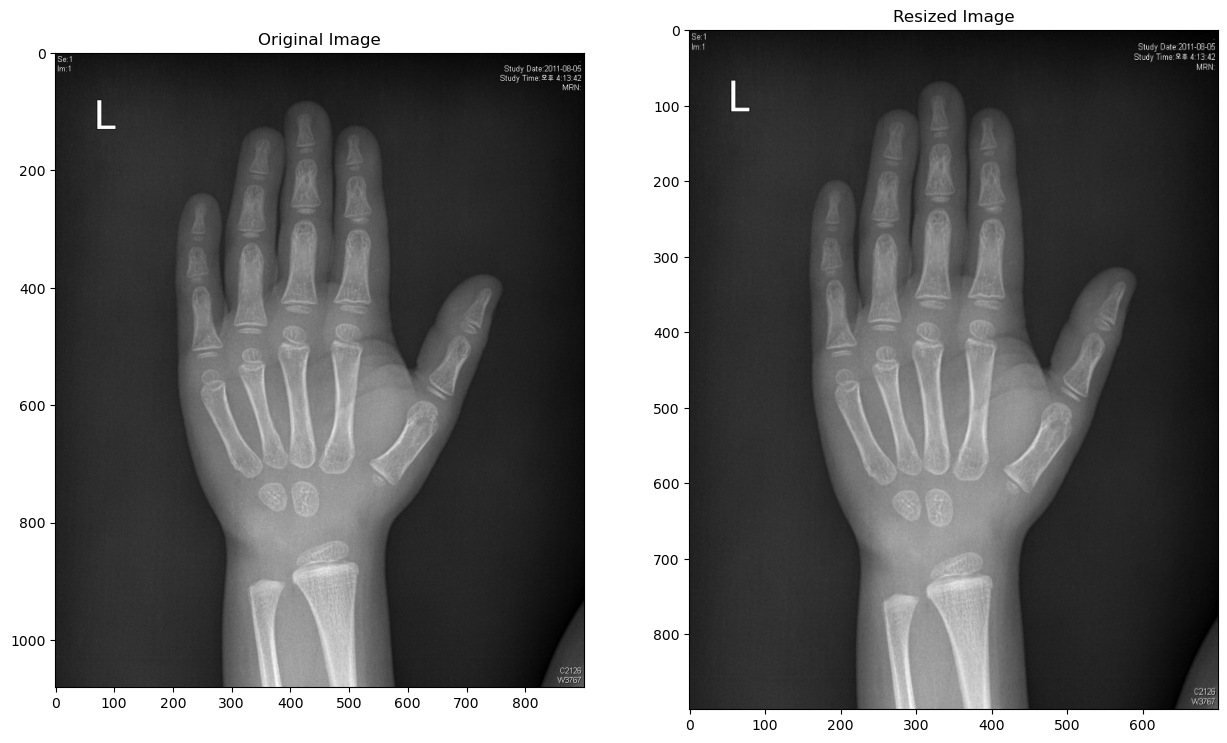

In [13]:
img_path = "/Users/jinwo/OneDrive/바탕 화면/골연령데이터/Data/Images/"
img_sample = plt.imread(img_path + "1_F.jpg", cv2.IMREAD_GRAYSCALE)

#이미지 데이터 타입 확인
print("이미지 데이터 타입:", img_sample.dtype)

#이미지 사이즈 수정
resized_img=cv2.resize(img_sample, (700, 900))

#이미지 확인
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(img_sample, "gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(resized_img, "gray")
plt.title("Resized Image")

# 2.Rotation
## 2.1 손목자르기

(775, 700, 3)


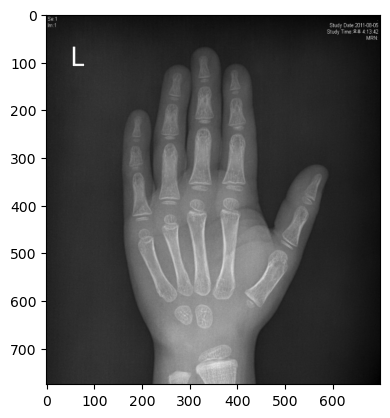

In [14]:
img = resized_img.copy()

height = img.shape[0]
width = img.shape[1]

#이미지의 아래에서부터 시작해서 화소 평균이 커지는(밝아지는) 경계선 찾기
start = int(height*0.95)  #아래 테두리가 밝은 경우를 고려해서 height*0.95부터 시작함
index = 0
k = 10 #10개 행씩 평균 구함
while True:
    pixel_lower = img[start-k*(index+1):start-k*index,:].mean()
    pixel_upper = img[start-k*(index+2):start-k*(index+1),:].mean()
    if pixel_upper - pixel_lower > 0:
        end_y = start-k*(index+1)
        break
    index += 1
    
img_center = img[:end_y]
rot_img1 = resized_img[:end_y]
img_color = rot_img1.copy()
print(img_center.shape)
plt.imshow(img_center)


## 2.2 센터값

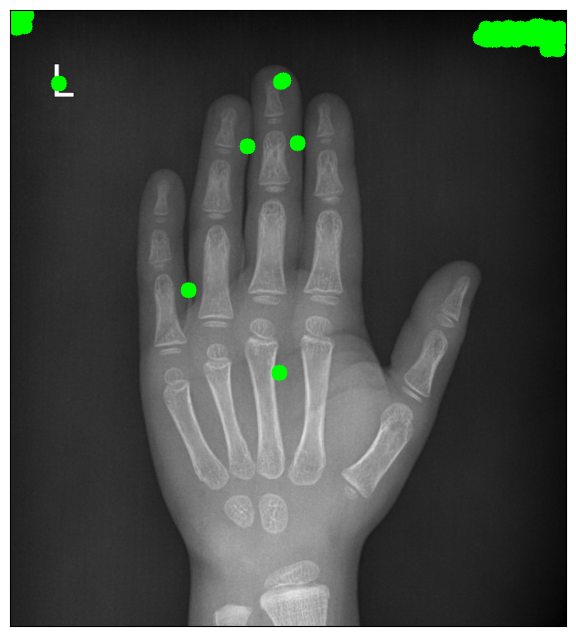

In [17]:
img_center = cv2.cvtColor(img_center, cv2.COLOR_BGR2GRAY)
res, thresh = cv2.threshold(img_center, img_center.mean(), 255, cv2.THRESH_BINARY)

# find contours in the thresholded image
cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        # draw the contour and center of the shape on the image
        cv2.drawContours(img_center, [c], -1, (0, 255, 0), 2)
        cv2.circle(img_color, (cX, cY), 10, (0, 255, 0), -1)

# center 좌표
center = cX, cY

# show(img_color)
show(img_color)


In [18]:
print(center)

(7, 9)


No pinky finger detected.


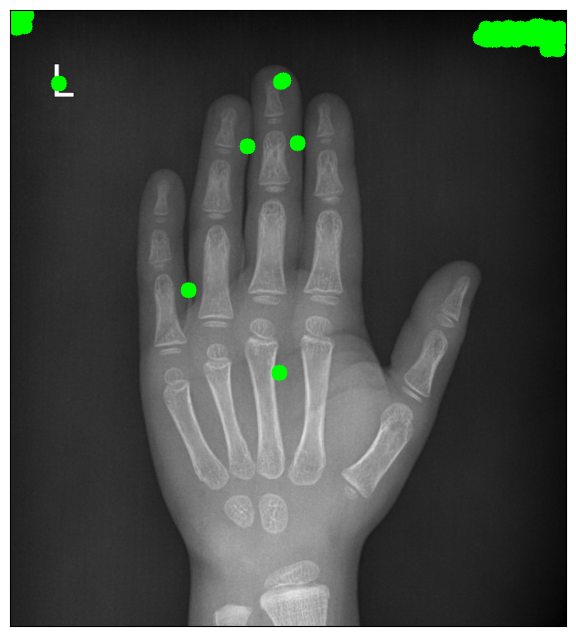

In [25]:
img_test = img_color.copy()

contours, hierarchy = cv2.findContours(img_center, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_cnt = max(contours, key=cv2.contourArea)
hull = cv2.convexHull(max_cnt, returnPoints = False)
defects = cv2.convexityDefects(max_cnt, hull)

start_list = []
far_list = []
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(max_cnt[s][0])
    end = tuple(max_cnt[e][0])
    far = tuple(max_cnt[f][0])
    far_list.append(far)

#새끼 손가락        
far_list.sort(key= lambda x:x[0])
pinky_list = []
for i in far_list:
    if i[1] < cY and i[0] < cX:
        pinky_list.append(i)

if pinky_list:
    pinky_list.sort(key= lambda x:x[0])
    pinky = pinky_list[0]
    pX, pY = pinky
    cv2.circle(img_test, pinky, 5, (255, 0, 255), 10)
    cv2.line(img_test, pinky, center, (0, 0, 123), 5 )
else:
    print("No pinky finger detected.")    


show(img_test)